#Record two example videos

In [10]:
!rm -rf test/
!rm -rf train/
!rm -rf val/

In [11]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");

      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});

      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();

      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

def mp4_to_frames(mp4_dir):
  cap = cv2.VideoCapture(mp4_dir)
  ret, frame = cap.read()
  imgs_list=[]
  while ret:
    frame_shrinked=[]
    for i in range(frame.shape[-1]):
      frame_shrinked.append(cv2.resize(np.squeeze(frame[:,:,i]), dsize=(int(frame.shape[1]/2),int(frame.shape[0]/2))))
    imgs_list.append(np.array(frame_shrinked).transpose(1,2,0).astype(int))
    ret, frame = cap.read()
  return np.array(imgs_list)

In [3]:
video_path = "sample_data//scissors.mp4"
record_video(video_path)
# 1010 111 11 0110 001 1 0 010

<IPython.core.display.Javascript object>

Finished recording video at:sample_data//scissors.mp4


In [4]:
video_path = "sample_data//rock.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:sample_data//rock.mp4


In [5]:
video_path = "sample_data//paper.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:sample_data//paper.mp4


In [14]:
!pip install opencv-python
import cv2
import os

# Chemin de la vidéo
video_path = "sample_data/scissors.mp4"
# Dossiers de sortie pour les frames
train_folder = "train/scissors"
test_folder = "test/scissors"
val_folder = "val/scissors"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)
frames = []
frame_count = 0

# Lire chaque frame de la vidéo
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
    frame_count += 1

cap.release()
print(f"Total frames extraites: {frame_count}")

# Mélanger les frames et diviser en train/test (70/30)
import random
random.shuffle(frames)
total_frames = len(frames)
train_end = int(total_frames * 0.7)
val_end = int(total_frames * 0.85)

train_frames = frames[:train_end]
val_frames = frames[train_end:val_end]
test_frames = frames[val_end:]

# Sauvegarder les frames d'entraînement
for i, frame in enumerate(train_frames):
    cv2.imwrite(f"{train_folder}/frame_{i}.jpg", frame)

# Sauvegarder les frames de test
for i, frame in enumerate(test_frames):
    cv2.imwrite(f"{test_folder}/frame_{i}.jpg", frame)

for i, frame in enumerate(val_frames):
    cv2.imwrite(f"{val_folder}/frame_{i}.jpg", frame)

print(f"{len(train_frames)} frames enregistrées dans '{train_folder}'.")
print(f"{len(test_frames)} frames enregistrées dans '{test_folder}'.")
print(f"{len(val_frames)} frames enregistrées dans '{val_folder}'.")

Total frames extraites: 341
238 frames enregistrées dans 'train/scissors'.
52 frames enregistrées dans 'test/scissors'.
51 frames enregistrées dans 'val/scissors'.


In [15]:
!pip install opencv-python
import cv2
import os

# Chemin de la vidéo
video_path = "sample_data/rock.mp4"
# Dossiers de sortie pour les frames
train_folder = "train/rock"
test_folder = "test/rock"
val_folder = "val/rock"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)
frames = []
frame_count = 0

# Lire chaque frame de la vidéo
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
    frame_count += 1

cap.release()
print(f"Total frames extraites: {frame_count}")

# Mélanger les frames et diviser en train/test (70/30)
import random
random.shuffle(frames)
total_frames = len(frames)
train_end = int(total_frames * 0.7)
val_end = int(total_frames * 0.85)

train_frames = frames[:train_end]
val_frames = frames[train_end:val_end]
test_frames = frames[val_end:]

# Sauvegarder les frames d'entraînement
for i, frame in enumerate(train_frames):
    cv2.imwrite(f"{train_folder}/frame_{i}.jpg", frame)

# Sauvegarder les frames de test
for i, frame in enumerate(test_frames):
    cv2.imwrite(f"{test_folder}/frame_{i}.jpg", frame)

for i, frame in enumerate(val_frames):
    cv2.imwrite(f"{val_folder}/frame_{i}.jpg", frame)

print(f"{len(train_frames)} frames enregistrées dans '{train_folder}'.")
print(f"{len(test_frames)} frames enregistrées dans '{test_folder}'.")
print(f"{len(val_frames)} frames enregistrées dans '{val_folder}'.")

Total frames extraites: 282
197 frames enregistrées dans 'train/rock'.
43 frames enregistrées dans 'test/rock'.
42 frames enregistrées dans 'val/rock'.


In [16]:
!pip install opencv-python
import cv2
import os

# Chemin de la vidéo
video_path = "sample_data/paper.mp4"
# Dossiers de sortie pour les frames
train_folder = "train/paper"
test_folder = "test/paper"
val_folder = "val/paper"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)
frames = []
frame_count = 0

# Lire chaque frame de la vidéo
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
    frame_count += 1

cap.release()
print(f"Total frames extraites: {frame_count}")

# Mélanger les frames et diviser en train/test (70/30)
import random
random.shuffle(frames)

total_frames = len(frames)
train_end = int(total_frames * 0.7)
val_end = int(total_frames * 0.85)

train_frames = frames[:train_end]
val_frames = frames[train_end:val_end]
test_frames = frames[val_end:]

# Sauvegarder les frames d'entraînement
for i, frame in enumerate(train_frames):
    cv2.imwrite(f"{train_folder}/frame_{i}.jpg", frame)

# Sauvegarder les frames de test
for i, frame in enumerate(test_frames):
    cv2.imwrite(f"{test_folder}/frame_{i}.jpg", frame)

for i, frame in enumerate(val_frames):
    cv2.imwrite(f"{val_folder}/frame_{i}.jpg", frame)

print(f"{len(train_frames)} frames enregistrées dans '{train_folder}'.")
print(f"{len(test_frames)} frames enregistrées dans '{test_folder}'.")
print(f"{len(val_frames)} frames enregistrées dans '{val_folder}'.")

Total frames extraites: 342
239 frames enregistrées dans 'train/paper'.
52 frames enregistrées dans 'test/paper'.
51 frames enregistrées dans 'val/paper'.


In [18]:
import shutil

# Compresser le dossier en .zip
shutil.make_archive('train', 'zip', 'train')
shutil.make_archive('test', 'zip', 'test')
shutil.make_archive('val', 'zip', 'val')

# Télécharger le fichier compressé
from google.colab import files
files.download('train.zip')
files.download('test.zip')
files.download('val.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Where to find pretrained model?

https://huggingface.co/models

https://pytorch.org/vision/stable/models.html#classification

https://tfhub.dev/

#Load a pretrained model from huggingface 🤗

In [ ]:
#!pip install transformers
from transformers import AutoFeatureExtractor, ResNetForImageClassification, ResNetModel


![ResNET18](https://www.researchgate.net/publication/342915846/figure/fig2/AS:913044574068738@1594698198420/Structure-of-the-standard-ResNet18-network-color-and-shape-networks-Every-layer.ppm)


In [ ]:
image = zeros_list[-1]

image_processor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18")
# "microsoft/resnet-18">"google/efficientnet-b7"
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-18")
# model = ResNetModel.from_pretrained("microsoft/resnet-18")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


sock


##Fine tune ResNet for two classes

###Create Dataloader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
# to have a balanced dataset
num_each_class_sample=min(len(zeros_list),len(ones_list))

# zeros_data=torch.Tensor(zeros_list[:num_each_class_sample])
# ones_data=torch.Tensor(ones_list[:num_each_class_sample])

tensor_x = torch.Tensor(np.append(zeros_list[:num_each_class_sample],
                                  ones_list[:num_each_class_sample],
                                  axis=0)).to(device) # transform to torch tensor
tensor_y = torch.Tensor(np.append(np.ones(num_each_class_sample),np.zeros(num_each_class_sample))).to(device)
# tensor_y = torch.Tensor(np.append([[0,1] for i in range(len(ones_data))],[[1,0] for i in range(len(zeros_data))]))
print("tensor_x.shape:",tensor_x.shape,", tensor_y.shape:",tensor_y.shape)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset,batch_size=10, shuffle=True) # create your dataloader

tensor_x.shape: torch.Size([696, 360, 640, 3]) , tensor_y.shape: torch.Size([696])


###Training function

In [ ]:
import time

def train(net, train_dataloader, criterion, optimizer, scheduler=None, epochs=10, device='cpu', checkpoint_epochs=2):
    start = time.time()
    print(f'Training for {epochs} epochs on {device}')

    for epoch in range(1,epochs+1):
        print(f"Epoch {epoch}/{epochs}")

        net.train()  # put network in train mode for Dropout and Batch Normalization
        train_loss = torch.tensor(0., device=device)  # loss and accuracy tensors are on the GPU to avoid data transfers
        train_accuracy = torch.tensor(0., device=device)
        for X, y in train_dataloader:
            X = X.to(device)
            y = y.type(torch.LongTensor).to(device)
            preds = net(X)
            loss = criterion(preds, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                train_loss += loss * train_dataloader.batch_size
                train_accuracy += (torch.argmax(preds, dim=1) == y).sum()

        if scheduler is not None:
            scheduler.step()

        print(f'Training loss: {train_loss/len(train_dataloader.dataset):.2f}')
        print(f'Training accuracy: {100*train_accuracy/len(train_dataloader.dataset):.2f}')


        if epoch%checkpoint_epochs==0:
            torch.save({
                'epoch': epoch,
                'state_dict': net.state_dict(),
                'optimizer': optimizer.state_dict(),
            }, './checkpoint.pth.tar')

        print()

    end = time.time()
    print(f'Total training time: {end-start:.1f} seconds')
    return net

In [ ]:
from transformers import ResNetModel
import torch

# model definition
class Classifier_model(torch.nn.Module):
    # define model elements
    def __init__(self):
        super(Classifier_model, self).__init__()
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.image_processor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18",device=self.device)
        self.pre_trained_model = ResNetModel.from_pretrained("microsoft/resnet-18")
        resnet18_output_size=25088
        self.fc = torch.nn.Linear(resnet18_output_size, 2)
        self.activation = torch.nn.ReLU()

    # forward propagate input
    def forward(self, X):
        X = self.image_processor(X, return_tensors="pt").to(self.device)
        # print(X.pixel_value.is_cuda)
        X = self.pre_trained_model(**X).last_hidden_state.flatten(start_dim=1)
        X = self.activation(X)
        X = self.fc(X)
        return X.softmax(dim=1)

In [ ]:
lr, weight_decay, epochs = 1e-5, 5e-4, 10

net = Classifier_model().to(device)

# Standard CrossEntropy Loss for multi-class classification problems
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.fc.parameters(),lr=lr, weight_decay=weight_decay)

net = train(net, my_dataloader, loss, optimizer, None, epochs, device)

Training for 10 epochs on cuda
Epoch 1/10
Training loss: 0.39
Training accuracy: 95.98

Epoch 2/10
Training loss: 0.33
Training accuracy: 100.00

Epoch 3/10
Training loss: 0.32
Training accuracy: 100.00

Epoch 4/10
Training loss: 0.32
Training accuracy: 100.00

Epoch 5/10
Training loss: 0.32
Training accuracy: 100.00

Epoch 6/10
Training loss: 0.32
Training accuracy: 100.00

Epoch 7/10
Training loss: 0.32
Training accuracy: 100.00

Epoch 8/10
Training loss: 0.32
Training accuracy: 100.00

Epoch 9/10
Training loss: 0.32
Training accuracy: 100.00

Epoch 10/10
Training loss: 0.32
Training accuracy: 100.00

Total training time: 179.3 seconds


In [ ]:
video_path = "sample_data//Test.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:sample_data//Test.mp4


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Classifier_model().to(device)
if torch.cuda.is_available():
  net.load_state_dict(torch.load("checkpoint.pth.tar")['state_dict'])
else:
  net.load_state_dict(torch.load("checkpoint.pth.tar",
                                map_location=torch.device('cpu'))['state_dict'])
net.eval()

test_list=mp4_to_frames("sample_data//Test.mp4")
print("The recorded video as the test has",len(test_list),"frames.")
test_data=torch.Tensor(test_list).to(device)
output=[]
preds = net(test_data)
output=torch.argmax(preds, dim=1)
output

The recorded video as the test has 215 frames.


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')

#Looking at test video's frames:

https://ezgif.com/video-to-jpg/

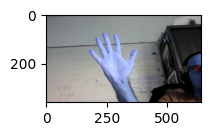

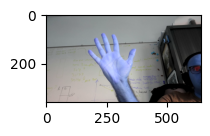

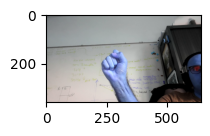

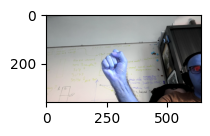

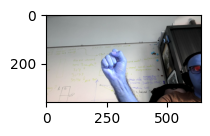

In [ ]:
test_list=mp4_to_frames("sample_data//Test.mp4")
i=0
for img in test_list:
  if i%50==0:
    plt.figure(int(i/50),figsize=(2, 2))
    plt.imshow(test_list[i])
  i+=1

#Annotation interface

The recorded video as the test has 323 frames.


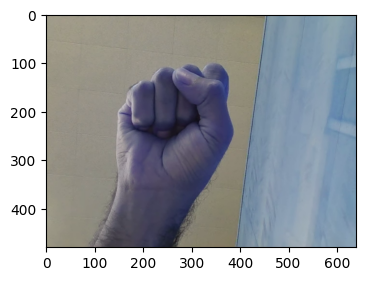

In [ ]:
test_list=mp4_to_frames("sample_data//Test.mp4")
print("The recorded video as the test has",len(test_list),"frames.")
frm_indx=np.random.randint(0,len(test_list)-1)
frame=test_list[frm_indx]

plt.figure(i,figsize=(4, 4))
plt.imshow(frame)

In [ ]:
label=str(input("What is the label of above frame?\n\n>"))
print("You have annotated above frame with label of ",label)

What is the label of above frame?

>1


'1'

In [ ]:
# Dictionary representing the morse code chart
# MORSE_CODE_DICT = { 'A':'01', 'B':'1000','C':'1010', 'D':'100', 'E':'0',
#                     'F':'0010', 'G':'110', 'H':'0000','I':'00', 'J':'0111', 'K':'101',
#                     'L':'0100', 'M':'11', 'N':'10','O':'111', 'P':'0110', 'Q':'1101',
#                     'R':'010', 'S':'000', 'T':'1','U':'001', 'V':'0001', 'W':'011',
#                     'X':'1001', 'Y':'1011', 'Z':'1100','1':'01111', '2':'00111', '3':'00011',
#                     '4':'00001', '5':'00000', '6':'10000','7':'11000', '8':'11100', '9':'11110',
#                     '0':'11111'}



# Chapter 2 : Uncertainty sampling

In [ ]:
def least_confidence(net,test_data,n):
  """
  Returns the sample index from test_data based on the uncertainty scores
  using the least confidence sampling

  Keyword arguments:
    net       : the trained neural network
    test_data : the samples as the input of the net
    n         : number of the best candidates based on least confidence

  Output:
    res.keys(): a list of indexes from input samples (test_data)
  """
  uncertainty_dict={} # as sample_index: uncertainty score
  for i in range(len(test_data)):
    preds = net(test_data[i]) # preds is a probability distribution of classes
    uncertainty_dict[i]=1-np.max(preds[0].cpu().detach().numpy())
  res = dict(sorted(uncertainty_dict.items(),
                    key = lambda x: x[1], reverse = True)[:n])

  return res.keys()

In [ ]:
least_confidence(net,test_data,5)

dict_keys([104, 105, 103, 244, 245])

In [ ]:
def margin_confidence(net,test_data,n):
  """
  Returns the sample index from test_data based on the uncertainty scores
  using the margin of confidence sampling

  Keyword arguments:
    net       : the trained neural network
    test_data : the samples as the input of the net
    n         : number of the best candidates based on margin of confidence

  Output:
    res.keys(): a list of indexes from input samples (test_data)
  """
  uncertainty_dict={} # as sample_index: uncertainty score
  for i in range(len(test_data)):
    preds = net(test_data[i]) # preds is a probability distribution of classes
    preds_sorted = np.sort(preds[0].cpu().detach().numpy())
    uncertainty_dict[i]=(preds_sorted[0]-preds_sorted[1])
  res = dict(sorted(uncertainty_dict.items(),
                    key = lambda x: x[1], reverse = True)[:n])

  return res.keys()

In [ ]:
margin_confidence(net,test_data,5)

dict_keys([104, 105, 103, 244, 245])

In [ ]:
def ratio_confidence(net,test_data,n):
  """
  Returns the sample index from test_data based on the uncertainty scores
  using the ratio of confidence sampling

  Keyword arguments:
    net       : the trained neural network
    test_data : the samples as the input of the net
    n         : number of the best candidates based on margin of confidence

  Output:
    res.keys(): a list of indexes from input samples (test_data)
  """
  uncertainty_dict={} # as sample_index: uncertainty score
  for i in range(len(test_data)):
    preds = net(test_data[i]) # preds is a probability distribution of classes
    preds_sorted = np.sort(preds[0].cpu().detach().numpy())
    uncertainty_dict[i]=(preds_sorted[0]/preds_sorted[1])
  res = dict(sorted(uncertainty_dict.items(),
                    key = lambda x: x[1], reverse = True)[:n])

  return res.keys()

In [ ]:
from scipy.stats import entropy

def entropy_confidence(net,test_data,n):
  """
  Returns the sample index from test_data based on the uncertainty scores
  using the entropy of the probablities

  Keyword arguments:
    net       : the trained neural network
    test_data : the samples as the input of the net
    n         : number of the best candidates based on margin of confidence

  Output:
    res.keys(): a list of indexes from input samples (test_data)
  """
  uncertainty_dict={} # as sample_index: uncertainty score
  for i in range(len(test_data)):
    preds = net(test_data[i]) # preds is a probability distribution of classes
    uncertainty_dict[i]=entropy(preds[0].cpu().detach().numpy())
  res = dict(sorted(uncertainty_dict.items(),
                    key = lambda x: x[1], reverse = True)[:n])

  return res.keys()

In [ ]:
entropy_confidence(net,test_data,5)

dict_keys([104, 105, 103, 244, 245])

# Chapter 3 : Diversity sampling

In [ ]:
from transformers import ResNetModel
import torch

# model definition
class Classifier_model(torch.nn.Module):
    # define model elements
    def __init__(self):
        super(Classifier_model, self).__init__()
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.image_processor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18",
                                                                    device=self.device)
        self.pre_trained_model = ResNetModel.from_pretrained("microsoft/resnet-18")
        resnet18_output_size=25088
        self.fc = torch.nn.Linear(resnet18_output_size, 2)
        self.activation = torch.nn.ReLU()

    # forward propagate input
    def forward(self, X, return_all_layers=False):
        X = self.image_processor(X, return_tensors="pt").to(self.device)
        X = self.pre_trained_model(**X).last_hidden_state.flatten(start_dim=1)
        X1 = self.activation(X)
        X2 = self.fc(X1)
        if return_all_layers:
          return X2.softmax(dim=1),X2,X1
        else:
          return X2.softmax(dim=1)


In [ ]:
from numpy.linalg import norm as euclidean_dis
def get_model_outliers(net,training_data,test_data,n):
  """
  Returns the sample index from test_data based on the uncertainty scores
  using the model-based outliers

  Keyword arguments:
    net           : the trained neural network
    training_data : the unlabeled samples as the input of the net
    test_data     : the training samples as the input of the net
    n             : number of the best candidates based on margin of confidence

  Output:
    res.keys(): a list of indexes from input samples (test_data)
  """
  uncertainty_dict={} # as sample_index: uncertainty score
  #calculating the mean of training samples in hidden neurons
  trainingSet_hidden_values=[]
  for i in range(len(training_data)):
    # preds is a probability distribution of classes
    _,x2,_ = net(training_data[i],return_all_layers=True)
    trainingSet_hidden_values.append(x2[0].cpu().detach().numpy())
  # calculate mean vector
  trainingSet_hidden_avg = np.mean(np.array(trainingSet_hidden_values),axis=0)
  # calculate distance/difference of test set from mean of training set
  for i in range(len(test_data)):
    # preds is a probability distribution of classes
    _,x2,_ = net(test_data[i],return_all_layers=True)
    # Uncertainty score is defined as the euclidean distance from training mean
    uncertainty_dict[i]=euclidean_dis(x2[0].cpu().detach().numpy()-trainingSet_hidden_avg)
  # calculate ranking
  res = dict(sorted(uncertainty_dict.items(),
                    key = lambda x: x[1], reverse = False)[:n])

  return res.keys()

In [ ]:
from numpy.linalg import norm as euclidean_dis
def get_representative_samples(training_data,test_data,n):
  """
  Returns the sample index from test_data based on the uncertainty scores
  using the representative sampling

  Keyword arguments:
    net           : the trained neural network
    training_data : the unlabeled samples as the input of the net
    test_data     : the training samples as the input of the net
    n             : number of the best candidates based on margin of confidence

  Output:
    res.keys(): a list of indexes from input samples (test_data)
  """
  uncertainty_dict={} # as sample_index: uncertainty score
  #calculating the mean of training/test samples
  trainingSet_avg = np.mean(np.array(training_data),axis=0)
  testSet_avg = np.mean(np.array(test_data),axis=0)
  # calculate distance/difference of test set from mean of training/test set
  for i in range(len(test_data)):
    # Uncertainty score is defined as the ratio of distance from centroids
    uncertainty_dict[i]=(euclidean_dis(test_data[i]-trainingSet_avg)
    /euclidean_dis(test_data[i]-testSet_avg))
  # calculate ranking
  res = dict(sorted(uncertainty_dict.items(),
                    key = lambda x: x[1], reverse = False)[:n])

  return res.keys()

#Chapter 4 : Advanced active learning

In [ ]:
from transformers import ResNetModel
import torch

# model definition
class Classifier_model(torch.nn.Module):
    # define model elements
    def __init__(self):
        super(Classifier_model, self).__init__()
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.image_processor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18",
                                                                    device=self.device)
        self.pre_trained_model = ResNetModel.from_pretrained("microsoft/resnet-18")
        resnet18_output_size=25088
        self.fc = torch.nn.Linear(resnet18_output_size, 2)
        self.activation = torch.nn.ReLU()

    # forward propagate input
    def forward(self, X, return_all_layers=False):
        X = self.image_processor(X, return_tensors="pt").to(self.device)
        X = self.pre_trained_model(**X).last_hidden_state.flatten(start_dim=1)
        X1 = self.activation(X)
        X2 = self.fc(X1)
        if return_all_layers:
          return X2.softmax(dim=1),X2,X1
        else:
          return X2.softmax(dim=1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net_base = Classifier_model().to(device)
if torch.cuda.is_available():
  net.load_state_dict(torch.load("checkpoint.pth.tar")['state_dict'])
else:
  net.load_state_dict(torch.load("checkpoint.pth.tar",
                                map_location=torch.device('cpu'))['state_dict'])
net_base.eval()
print("the model is loaded")

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


the model is loaded


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
zeros_list_val=mp4_to_frames("sample_data//0_val.mp4")
ones_list_val=mp4_to_frames("sample_data//1_val.mp4")

noise_thr=60
noise=int(noise_thr/2)-np.random.randint(noise_thr, size=zeros_list_val[0].shape)

label_correctness=[]
for i in range(len(zeros_list_val)):
  pred=np.argmax(net_base(torch.Tensor(np.clip(zeros_list_val[i]+noise,0,255)))[0].cpu().detach().numpy())
  if pred==0:
    label_correctness.append(1)
  else:
    label_correctness.append(0)

for i in range(len(ones_list_val)):
  pred=np.argmax(net_base(torch.Tensor(np.clip(ones_list_val[i]+noise,0,255)))[0].cpu().detach().numpy())
  if pred==0:
    label_correctness.append(0)
  else:
    label_correctness.append(1)

tensor_x = torch.Tensor(np.append(ones_list_val,zeros_list_val,axis=0)).to(device)
tensor_y = torch.Tensor(label_correctness).to(device)

print("tensor_x.shape:",tensor_x.shape,", tensor_y.shape:",tensor_y.shape)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset,batch_size=10, shuffle=True) # create your dataloader

tensor_x.shape: torch.Size([520, 480, 640, 3]) , tensor_y.shape: torch.Size([520])


In [ ]:
import time

class Correctness_model(torch.nn.Module):
    # define model elements
    def __init__(self):
        super(Correctness_model, self).__init__()
        resnet18_output_size=25088
        self.fc = torch.nn.Linear(resnet18_output_size, 2)

    def forward(self, X):
        X = self.fc(X)
        return X.softmax(dim=1)

def train(feature_extractor, correctness_model, train_dataloader, criterion,
          optimizer, epochs=10, device='cpu', checkpoint_epochs=2):
    start = time.time()
    print(f'Training for {epochs} epochs on {device}')

    for epoch in range(1,epochs+1):
        print(f"Epoch {epoch}/{epochs}")

        feature_extractor.eval()   # freeze network in eval mode
        correctness_model.train()  # put network in train mode
        train_loss = torch.tensor(0., device=device)
        train_accuracy = torch.tensor(0., device=device)
        for X, y in train_dataloader:
            X = X.to(device)
            y = y.type(torch.LongTensor).to(device)
            _,_,X = feature_extractor(X,return_all_layers=True)
            preds = correctness_model(X)
            loss = criterion(preds, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                train_loss += loss * train_dataloader.batch_size
                train_accuracy += (torch.argmax(preds, dim=1) == y).sum()

        print(f'Training loss: {train_loss/len(train_dataloader.dataset):.2f}')
        print(f'Training accuracy: {100*train_accuracy/len(train_dataloader.dataset):.2f}')


        if epoch%checkpoint_epochs==0:
            torch.save({
                'epoch': epoch,
                'state_dict': net.state_dict(),
                'optimizer': optimizer.state_dict(),
            }, './checkpoint_corr.pth.tar')

        print()

    end = time.time()
    print(f'Total training time: {end-start:.1f} seconds')
    return net

In [ ]:
lr, weight_decay, epochs = 1e-5, 5e-4, 10

net = Correctness_model().to(device)

# Standard CrossEntropy Loss for multi-class classification problems
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.fc.parameters(),lr=lr, weight_decay=weight_decay)

net = train(net_base, net, my_dataloader, loss, optimizer, None, epochs, device)

Training for 10 epochs on cuda
Epoch 1/10
Training loss: 0.57
Training accuracy: 70.96

Epoch 2/10
Training loss: 0.50
Training accuracy: 82.31

Epoch 3/10
Training loss: 0.48
Training accuracy: 83.85

Epoch 4/10
Training loss: 0.47
Training accuracy: 83.85

Epoch 5/10
Training loss: 0.47
Training accuracy: 85.77

Epoch 6/10
Training loss: 0.46
Training accuracy: 86.15

Epoch 7/10
Training loss: 0.45
Training accuracy: 88.27

Epoch 8/10
Training loss: 0.44
Training accuracy: 87.69

Epoch 9/10
Training loss: 0.44
Training accuracy: 88.65

Epoch 10/10
Training loss: 0.43
Training accuracy: 89.42

Total training time: 173.5 seconds


In [ ]:
feature_extractor = Classifier_model().to(device)
if torch.cuda.is_available():
  feature_extractor.load_state_dict(torch.load("checkpoint.pth.tar")['state_dict'])
else:
  feature_extractor.load_state_dict(torch.load("checkpoint.pth.tar",
                                map_location=torch.device('cpu'))['state_dict'])
feature_extractor.eval()

correctness_model = Correctness_model().to(device)
if torch.cuda.is_available():
  correctness_model.load_state_dict(torch.load("checkpoint_corr.pth.tar")['state_dict'])
else:
  correctness_model.load_state_dict(torch.load("checkpoint_corr.pth.tar",
                                map_location=torch.device('cpu'))['state_dict'])
correctness_model.eval()
print("the models are loaded")

test_list=mp4_to_frames("sample_data//Test.mp4")
print("The recorded video as the test has",len(test_list),"frames.")
test_data=torch.Tensor(test_list).to(device)

sample_score_dict={}
for i in range(len(test_data)):
  _,_,X = feature_extractor(test_data[i],return_all_layers=True)
  preds = correctness_model(X)[0]
  sample_score_dict[i]=preds[0].cpu().detach().numpy()


the models are loaded
The recorded video as the test has 323 frames.


{0: array(0.81494224, dtype=float32),
 1: array(0.7057995, dtype=float32),
 2: array(0.82313955, dtype=float32),
 3: array(0.8216637, dtype=float32),
 4: array(0.8637357, dtype=float32),
 5: array(0.8153121, dtype=float32),
 6: array(0.78844583, dtype=float32),
 7: array(0.5861558, dtype=float32),
 8: array(0.27440813, dtype=float32),
 9: array(0.59359396, dtype=float32),
 10: array(0.85530037, dtype=float32),
 11: array(0.87008035, dtype=float32),
 12: array(0.84084564, dtype=float32),
 13: array(0.86111116, dtype=float32),
 14: array(0.8837519, dtype=float32),
 15: array(0.8130168, dtype=float32),
 16: array(0.84304553, dtype=float32),
 17: array(0.8273873, dtype=float32),
 18: array(0.77017325, dtype=float32),
 19: array(0.8355741, dtype=float32),
 20: array(0.8860816, dtype=float32),
 21: array(0.86351573, dtype=float32),
 22: array(0.88081443, dtype=float32),
 23: array(0.8819783, dtype=float32),
 24: array(0.8387113, dtype=float32),
 25: array(0.82749057, dtype=float32),
 26: arr